Creating data...
Sampling features took 0.00483989715576
Calculating outputs took 6.98272895813
Created data!
Ranking parameter pairs...


/anaconda2/lib/python2.7/site-packages/scoop/fallbacks.py:46: RuntimeWarning: SCOOP was not started properly.
Be sure to start your program with the '-m scoop' parameter. You can find further information in the documentation.
Your map call has been replaced by the builtin serial Python map().
  RuntimeWarning


Ranked parameter pairs!
this took 14.2436761856 seconds


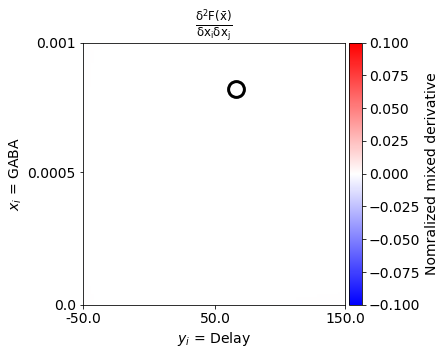

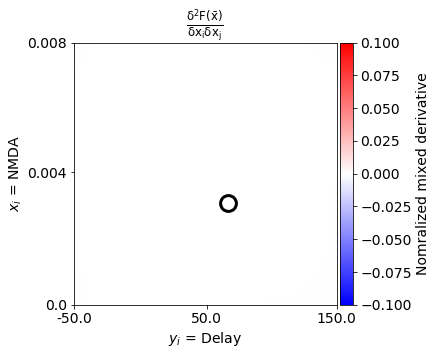

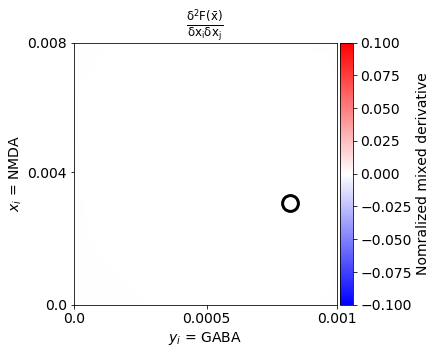

In [1]:
%matplotlib inline

import argparse
import sys
import pandas as pd
import numpy as np
import utils
import time
import hint
import os
from importlib import import_module

if os.path.exists("results") == False: os.mkdir('results/')


''' 
example models: 

'Gaussian_10' - Global interaction baseline, based on Friedman, 2001, with 10 variables and 25 interactions
'Gaussian_100' - Global interaction baseline, based on Friedman, 2001, with 100 variables and 1000 interactions
'VIN_function'- Global interaction baseline, based on Hooker, 2004, with 10 variables and 11 interactions
'Local' - Local interaction baseline, modification of Friedman, 2001 to create local interactions
'BAP' - Reproduction of Jones et al, 2017: a biophysical model of a neuron soma with backpropagating action potential
'NMDA' - Reproduction of Doron et al, 2017: a biophysical model of a neuron dendrite with excitation, inhibition, and time difference between the two
'soma' - A biophysical model of cell soma, with 11 ion channel parameters
'''

name = 'NMDA'
model_path = 'NMDA'
model = import_module(model_path)
number_of_core_samples = 100
step_size = 0.1
output_path = 'results'
top_k_to_plot = 3 # number of parameter pairs to plot. Notice - number_of_core_samples needs to be at least 3!

create_data = True # Creates new input-output samples from the model
rank_global = True # ranks pairs for global accuracy measurement
rank_local = False # ranks pairs for local accuracy measurement
measure_global_accuracy = False # measures global accuracy (Won't work for non-global-baseline models)
measure_local_accuracy = False # measures local accuracy (Won't work for non-local-baseline models)

start = time.time()
model = import_module(model_path)
if (create_data):
    print('Creating data...')
    utils.create_data(model, number_of_core_samples, step_size, name, output_path)
    print('Created data!')          
if (rank_global):
    print('Ranking parameter pairs...')
    utils.rank_global(model, number_of_core_samples, step_size, name, output_path, top_k_to_plot)
    print('Ranked parameter pairs!')
if (rank_local):
    print('Ranking individual samples...')    
    print(utils.rank_local(model, number_of_core_samples, step_size, name, threshold, output_path, top_k_to_plot))
    print('Ranked individual samples!')        
if (measure_global_accuracy):
    print('Measuring parameter pair ranking accuracy...')    
    print('global accuracy is {}'.format(utils.measure_global_accuracy(model, number_of_core_samples, step_size, name, output_path)))
    print('Measured parameter pair ranking accuracy!')        
if (measure_local_accuracy):
    print('Measuring individual samples ranking accuracy...')     
    print(utils.measure_local_accuracy(model, number_of_core_samples, step_size, name, output_path))
    print('Measured individual samples ranking accuracy!')         
print('this took {} seconds'.format(time.time() - start))
